In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample toy dataset (you can replace with your own)
# X_train: shape (m, n) where m = examples, n = features
X_train = np.array([
    [1.0, 2.0],
    [2.0, 0.5],
    [3.0, 2.5],
    [4.0, 0.8]
])
y_train = np.array([5.0, 4.2, 7.8, 8.3])


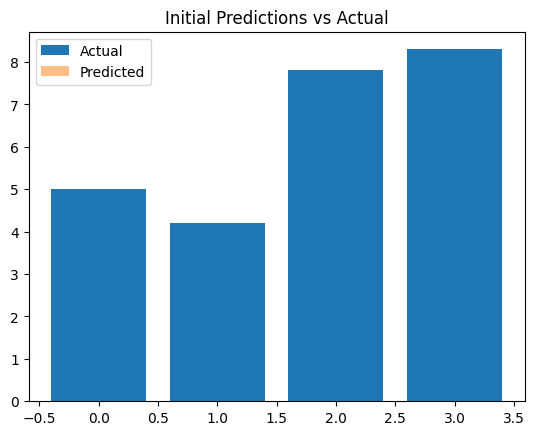

In [4]:
def predict(X, w, b):
    """
    Vectorized prediction for Linear Regression.
    X: shape (m, n)
    w: shape (n,)
    b: scalar
    Returns: predictions, shape (m,)
    """
    return np.dot(X, w) + b

# Initialize weights & bias
w = np.zeros(X_train.shape[1])
b = 0.0

# Show predictions (initially all zeros)
y_pred = predict(X_train, w, b)
plt.bar(range(len(y_train)), y_train, label='Actual')
plt.bar(range(len(y_pred)), y_pred, label='Predicted', alpha=0.5)
plt.title('Initial Predictions vs Actual')
plt.legend()
plt.show()


In [5]:
def compute_cost(X, y, w, b):
    """
    Compute cost for linear regression.
    """
    m = X.shape[0]
    preds = predict(X, w, b)
    cost = np.sum((preds - y) ** 2) / (2 * m)
    return cost

cost = compute_cost(X_train, y_train, w, b)
print("Initial Cost:", cost)


Initial Cost: 21.54625


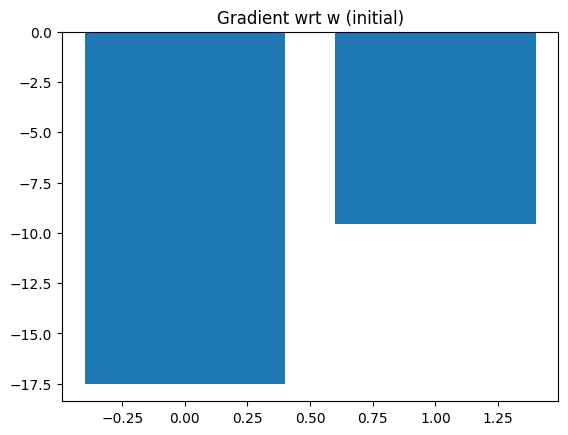

Gradient wrt b (initial): -6.325


In [8]:
def compute_gradient(X, y, w, b):
    """
    Computes gradient of cost function wrt w and b.
    Returns grad_w (vector) and grad_b (scalar).
    """
    m, n = X.shape
    preds = predict(X, w, b)
    diff = preds - y
    grad_w = np.dot(X.T, diff) / m
    grad_b = np.sum(diff) / m
    return grad_w, grad_b

# Visualize gradients (for initial w, b)
grad_w, grad_b = compute_gradient(X_train, y_train, w, b)
plt.bar(range(len(grad_w)), grad_w)
plt.title('Gradient wrt w (initial)')
plt.show()
print(f'Gradient wrt b (initial): {grad_b}')


Iteration 0: Cost 17.39306818005
Iteration 10: Cost 2.110133109218845
Iteration 20: Cost 0.3315788822119094
Iteration 30: Cost 0.12187848184158828
Iteration 40: Cost 0.09491617660528845
Iteration 50: Cost 0.08963055402131617
Iteration 60: Cost 0.08723587830722623
Iteration 70: Cost 0.08548297809980555
Iteration 80: Cost 0.0840552750471911
Iteration 90: Cost 0.08287068327852959


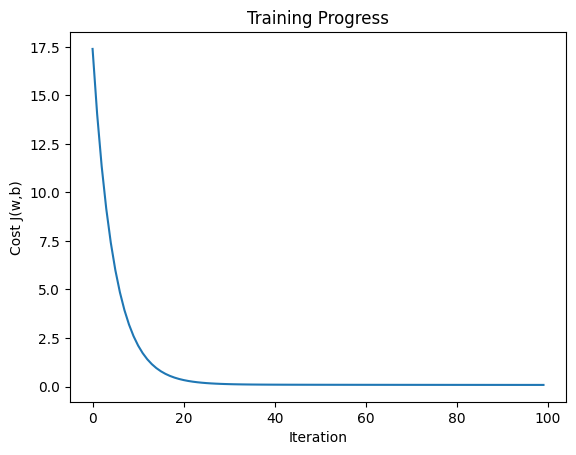

In [9]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters):
    """
    Performs gradient descent and records cost history.
    """
    w = w_init.copy()
    b = b_init
    cost_history = []
    for i in range(num_iters):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w = w - alpha * grad_w
        b = b - alpha * grad_b
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        if i % 10 == 0:
            print(f"Iteration {i}: Cost {cost}")
    return w, b, cost_history

# Training parameters
alpha = 0.01  # Learning rate
num_iters = 100

w_final, b_final, cost_history = gradient_descent(X_train, y_train, w, b, alpha, num_iters)

# Cost progression plot
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost J(w,b)')
plt.title('Training Progress')
plt.show()


Final Learned Weights: [1.64291921 1.04125514]
Final Learned Bias: 0.6651571296009887


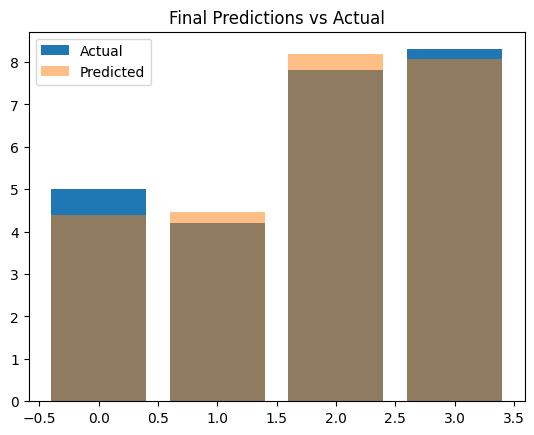

R^2 Score: 0.947


In [10]:
y_pred_final = predict(X_train, w_final, b_final)
print("Final Learned Weights:", w_final)
print("Final Learned Bias:", b_final)

# Bar chart actual vs predicted
plt.bar(range(len(y_train)), y_train, label='Actual')
plt.bar(range(len(y_train)), y_pred_final, label='Predicted', alpha=0.5)
plt.title('Final Predictions vs Actual')
plt.legend()
plt.show()

# Compute R^2 Score for match quality
def r2_score(y_actual, y_pred):
    ss_res = np.sum((y_actual - y_pred) ** 2)
    ss_tot = np.sum((y_actual - np.mean(y_actual)) ** 2)
    return 1 - (ss_res / ss_tot)

score = r2_score(y_train, y_pred_final)
print(f"R^2 Score: {score:.3f}")
